# Least Squares method analysis

In this notebook we study some peculiarities of the least squares method applied to the analysis of the bitcoin price and the solution of the point set registration problem.

## Problem statement

<h3 align="center"> Find the parameters of a function that best fits the model to the data set  </h3>


## Part 1

_Related with the nature of the data, which conditions should meet matrices 𝐴 and 𝑏 to be solvable from the least squares perspective?_

## Part 2

_Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values_

In [2]:
using CSV
using DataFrames

# Import the data as dataframe from the Bitcoin.csv file, then sort the dataframe by date (descending)
notOrderedDataBitcoin = CSV.read("./Bitcoin.csv",DataFrame);
dataBitcoin = sort!(notOrderedDataBitcoin)

# Take raw information and parse it to float number figures
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

In [3]:
# Display dataframe
println(dataBitcoin)

29×8 DataFrame
 Row │ Date          Price     Open      High      Low       Vol.     Change %  PriceFloat 
     │ String15      String15  String15  String15  String15  String7  String7   Float64    
─────┼─────────────────────────────────────────────────────────────────────────────────────
   1 │ Feb 07, 2022  43833.9   42,385.2  44,468.3  41,695.4  76.60K   3.40%        43833.9
   2 │ Feb 08, 2022  44038.2   43,833.9  45,399.8  42,705.0  92.88K   0.47%        44038.2
   3 │ Feb 09, 2022  44388.9   44,038.2  44,800.4  43,163.0  50.92K   0.80%        44388.9
   4 │ Feb 10, 2022  43521.0   44,388.9  45,755.2  43,242.5  89.69K   -1.96%       43521.0
   5 │ Feb 11, 2022  42388.4   43,519.3  43,915.1  42,023.4  69.95K   -2.60%       42388.4
   6 │ Feb 12, 2022  42205.2   42,388.4  43,006.4  41,776.8  37.88K   -0.43%       42205.2
   7 │ Feb 13, 2022  42061.1   42,205.5  42,725.1  41,880.1  25.88K   -0.34%       42061.1
   8 │ Feb 14, 2022  42550.3   42,061.1  42,799.7  41,591.3  53.60K   1.

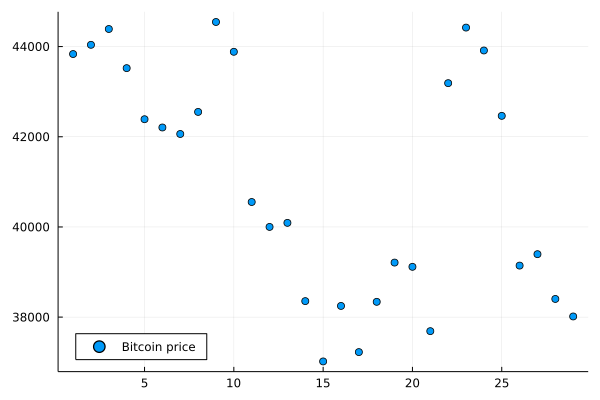

In [4]:
using Plots

# Plot bitcoin price(USD) over the time period (25 days)
plot(dataBitcoin.PriceFloat,seriestype = :scatter, label="Bitcoin price", legend= :bottomleft)

We now use a polynomial model to solve the least squares problem. Since we want to minimize:

\begin{equation*}
\sum_{i}((a_3x_i^3+a_2x_i^2+a_1x_i+a_0)-y_i)^2
\end{equation*}

A matrix form can be derived using A as a Vandermonde matrix and b as the known data vector, and then we have that we want to find $\tilde{x}$ such that :

\begin{equation*}
\tilde{x} = \mbox{arg min}_{x} ||Ax-b||^2
\end{equation*}

In [51]:
using LinearAlgebra

N = size(dataBitcoin.PriceFloat,1); # Get the number of entries in the bitcoin dataframe

A_1 = ones(N,1); 
A_2 = Array((1:N)); # Create an array with an enumeration of the registered dates
A_3 = [a^2 for a in A_2];
A_4 = [a^3 for a in A_2];

b = Array(dataBitcoin.PriceFloat);

A = [A_1 A_2 A_3 A_4 ] # Create Vandermonde matrix 

xhat = A\b # Solve the system

4-element Vector{Float64}:
 46208.126234684845
  -899.4687544282216
    42.51750419506936
    -0.6569227164402299

Since we found $\tilde{x}$ as the solution of our system, we can construct the graph representing our prediction function(pred) and how it fits the data set:

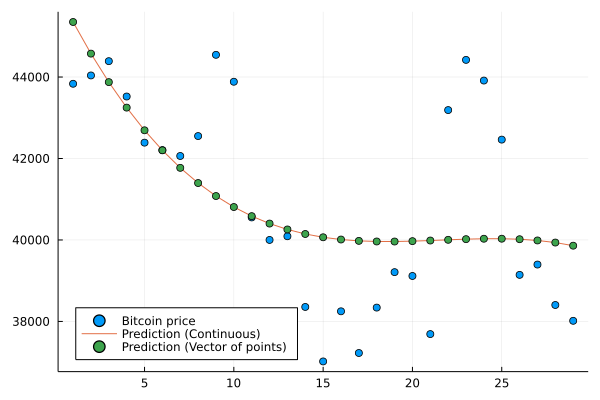

In [52]:
pred = Vector{Float64}(undef, N) # Initializing prediction vector of size N and undefined values
dim = size(xhat,1) # Get the dimension of the solution (xhat)

for i in 1:dim     # Construct the prediction vector 
    pred += (xhat[i]*A[:,i])
end

plot(A[:,2],b, seriestype = :scatter, label="Bitcoin price", legend=:bottomleft)
plot!(A[:,2],pred, label="Prediction (Continuous)")
plot!(A[:,2],pred, seriestype = :scatter, label="Prediction (Vector of points)")

Using this prediction it can be calculated the relative error of this aproximation over the dataset:

In [53]:
err = Vector{Float64}(undef, N)
errabs = Vector{Float64}(undef, N)
dig = 6
for i in 1:N
    
    err[i] = abs(b[i]-pred[i])
    
    errabs[i] = (err[i]/b[i])
    
    rb = round(b[i],digits=dig)
    rpred = round(pred[i],digits=dig)
    rerr = round(err[i],digits=dig)
    rerrabs = round(100*errabs[i],digits=dig)
    
    println("$(rb) | $(rpred) | $(rerr) | $(rerrabs)%")
end
min = round(100*minimum(errabs),digits=dig)
max = round(100*maximum(errabs),digits=dig)
println("Minimum err: $min %")
print("Maximum err: $max %" )

43833.9 | 45350.518062 | 1516.618062 | 3.45992%
44038.2 | 44574.003361 | 535.803361 | 1.216679%
44388.9 | 43874.640596 | 514.259404 | 1.158532%
43521.0 | 43248.48823 | 272.51177 | 0.626162%
42388.4 | 42691.604728 | 303.204728 | 0.715301%
42205.2 | 42200.048552 | 5.151448 | 0.012206%
42061.1 | 41769.878168 | 291.221832 | 0.692378%
42550.3 | 41397.152037 | 1153.147963 | 2.710082%
44544.4 | 41077.928624 | 3466.471376 | 7.782059%
43883.6 | 40808.266393 | 3075.333607 | 7.007934%
40552.8 | 40584.223808 | 31.423808 | 0.077489%
40000.1 | 40401.859332 | 401.759332 | 1.004396%
40090.3 | 40257.231428 | 166.931428 | 0.416389%
38355.0 | 40146.398561 | 1791.398561 | 4.670574%
37017.7 | 40065.419194 | 3047.719194 | 8.23314%
38248.2 | 40010.351791 | 1762.151791 | 4.60715%
37224.6 | 39977.254816 | 2752.654816 | 7.39472%
38339.2 | 39962.186732 | 1622.986732 | 4.233231%
39209.6 | 39961.206003 | 751.606003 | 1.916893%
39115.5 | 39970.371093 | 854.871093 | 2.185505%
37689.1 | 39985.740465 | 2296.640465 | 6

Based on the assumption that this model is appropriate and has a good accuracy, we can calculate the future values of the bitcoin price in a range of one week and compare them with the actual figures: 

In [54]:
# Import the data 
notOrderedDataBitcoinWeek = CSV.read("./BitcoinWeekAhead.csv",DataFrame);
dataBitcoinWeek = sort!(notOrderedDataBitcoinWeek)

# Take raw information and parse it to float number figures
dataBitcoinWeek.Price .= replace.(dataBitcoinWeek.Price, "," => "");
dataBitcoinWeek.PriceFloat = parse.(Float64, dataBitcoinWeek.Price);

# Display dataframe
println(dataBitcoinWeek)

7×8 DataFrame
 Row │ Date          Price     Open      High      Low       Vol.     Change %  PriceFloat 
     │ String15      String15  String15  String15  String15  String7  String7   Float64    
─────┼─────────────────────────────────────────────────────────────────────────────────────
   1 │ Mar 08, 2022  38744.8   38,020.6  39,351.5  37,886.6  2.67B    1.89%        38744.8
   2 │ Mar 09, 2022  41929.0   38,731.5  42,538.5  38,663.3  3.60B    8.22%        41929.0
   3 │ Mar 10, 2022  39416.3   41,933.9  42,029.1  38,603.5  3.62B    -5.99%       39416.3
   4 │ Mar 11, 2022  38730.2   39,422.5  40,177.0  38,236.4  2.79B    -1.74%       38730.2
   5 │ Mar 12, 2022  38814.3   38,730.2  39,355.3  38,666.5  1.11B    0.22%        38814.3
   6 │ Mar 13, 2022  37792.4   38,813.2  39,272.3  37,603.4  1.55B    -2.63%       37792.4
   7 │ Mar 14, 2022  39671.1   37,789.5  39,914.3  37,613.6  2.33B    4.97%        39671.1


39752.90403351441
39613.531733400734
39437.00681641932
39219.38774627152
38956.732986658695
38645.101001282186
38280.55025384339


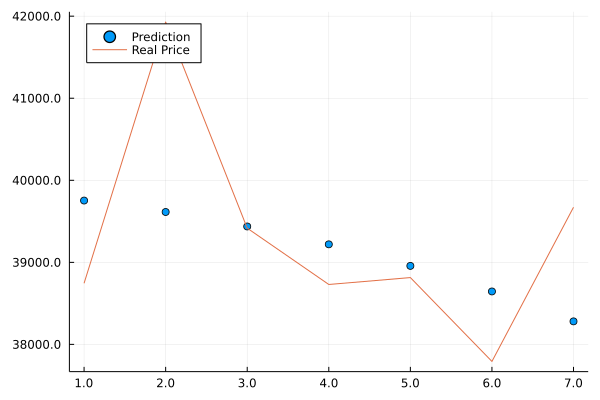

In [55]:
function f(x) 
    xhat[1]+xhat[2]*x+xhat[3]*x^2+xhat[4]*x^3 
end

p = Vector{Float64}(undef, 7)

for i in 1:7
    p[i] = f(i+29)
    println(f(i+29))
end

plot(1:7, p, seriestype = :scatter, formatter = identity, label = "Prediction", legend = :topleft)
plot!(1:7, dataBitcoinWeek.PriceFloat, label = "Real Price")

Thus we can conclude that the polynomial model of degree 3 has a maximum error on the real data of 6.3083%:

In [59]:
er = 100*(abs(f(2)-Array(dataBitcoinWeek.PriceFloat)[2])/Array(dataBitcoinWeek.PriceFloat)[2])

6.308291065556447

## Part 3

_Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year_